In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
import math

In [62]:
data_frame  = pd.read_csv('cm_dataset_2 - cm_dataset.csv', header=None)
x_vals = data_frame.iloc[:,0].values
y_vals = data_frame.iloc[:,1].values
initial_data = np.full((2, 1000), 0.0, dtype='float64')
initial_data[0] = x_vals
initial_data[1] = y_vals

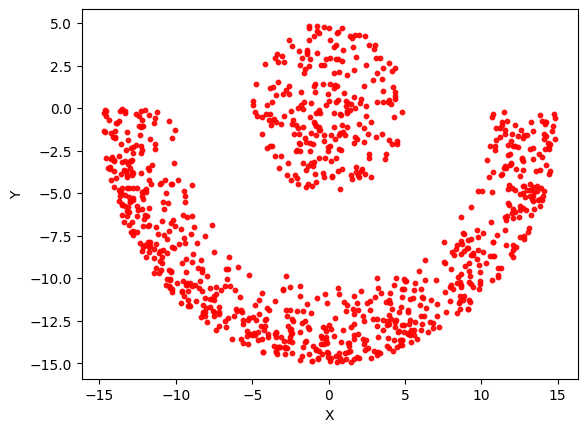

In [63]:
plt.scatter(x_vals, y_vals, s=10, color = (1, 0, 0), alpha=0.9)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### LLoyd's Algorithm
Runs LLoyd's Algorithm using parameters data, number of clusters and returns the assignment array, error list which contains error for each iteration.
Note that here data should be an N x D matrix where N is the number of data points and D is the number of features

In [64]:
def lloyds_algo(data, num_clusters):
    np.random.seed(0)
    D = data[0].size
    n = data[:,0].size
    num_points_in_clusters = np.zeros(num_clusters)
    z_assignment = np.random.randint(0, num_clusters, n) 
    for i in range(n):
        num_points_in_clusters[z_assignment[i]]+=1
    z_prev_assignment = np.zeros(n).astype(int)
    Error = []
    means = np.full((num_clusters, D), 0.0, dtype='float64')
    for j in range(num_clusters):
        count =0
        sum_data = np.full((1, D), 0.0, dtype='float64')
        for i in range(n):
            if(z_assignment[i]==j):
                sum_data+=data[i]
                count+=1
        sum_data/=count
        means[j] = sum_data
    
    while True:
        error = 0.0
        #  Reassignment
        for i in range(n):
            z_prev_assignment[i] = z_assignment[i]
            # error+=((x_vals[i]-means[z_assignment[i]][0])**2 + (y_vals[i]-means[z_assignment[i]][1])**2)
            for j in range(D):
                error+=(data[i][j]-means[z_assignment[i]][j])**2
            
            dist = []
            for j in range(len(means)):
                dist_sum = 0.0
                for k in range(D):
                    dist_sum+=(data[i][k]-means[j][k])**2                    
                dist.append(dist_sum)
            z_assignment[i] = np.argmin(dist)
            num_points_in_clusters[z_prev_assignment[i]]-=1
            num_points_in_clusters[z_assignment[i]]+=1
            if(num_points_in_clusters[z_prev_assignment[i]]==0):
                z_assignment[i] = z_prev_assignment[i]
                num_points_in_clusters[z_assignment[i]]-=1
                num_points_in_clusters[z_prev_assignment[i]]+=1
        if(np.array_equal(z_assignment, z_prev_assignment)):
            break
        Error.append(error)
        #  Mean calculation
        for j in range(num_clusters):
            count =0
            sum_data = np.full((1, D), 0.0, dtype='float64')
            for i in range(1000):
                if(z_assignment[i]==j):
                    sum_data+=data[i]
                    count+=1
            sum_data/=count
            means[j] = sum_data
    return z_assignment, Error

In [65]:
def error_calc(data, z_assignment, means = None):
    error = 0.0
    if means is None:
        l = np.max(z_assignment)+1
        D = data[:,0].size
        means = np.full((l, 2), 0.0, dtype='float64')
        count = np.zeros(l).astype(int)
        for i in range(data[0].size):
            means[z_assignment[i]] += data[:,i]
            count[z_assignment[i]] += 1
        for i in range(l): means[i] = means[i]/count[i]
    for i in range(data[0].size):
        error+=np.linalg.norm(data[:,i]-means[z_assignment[i]])
    return error

# Part 1 of the question

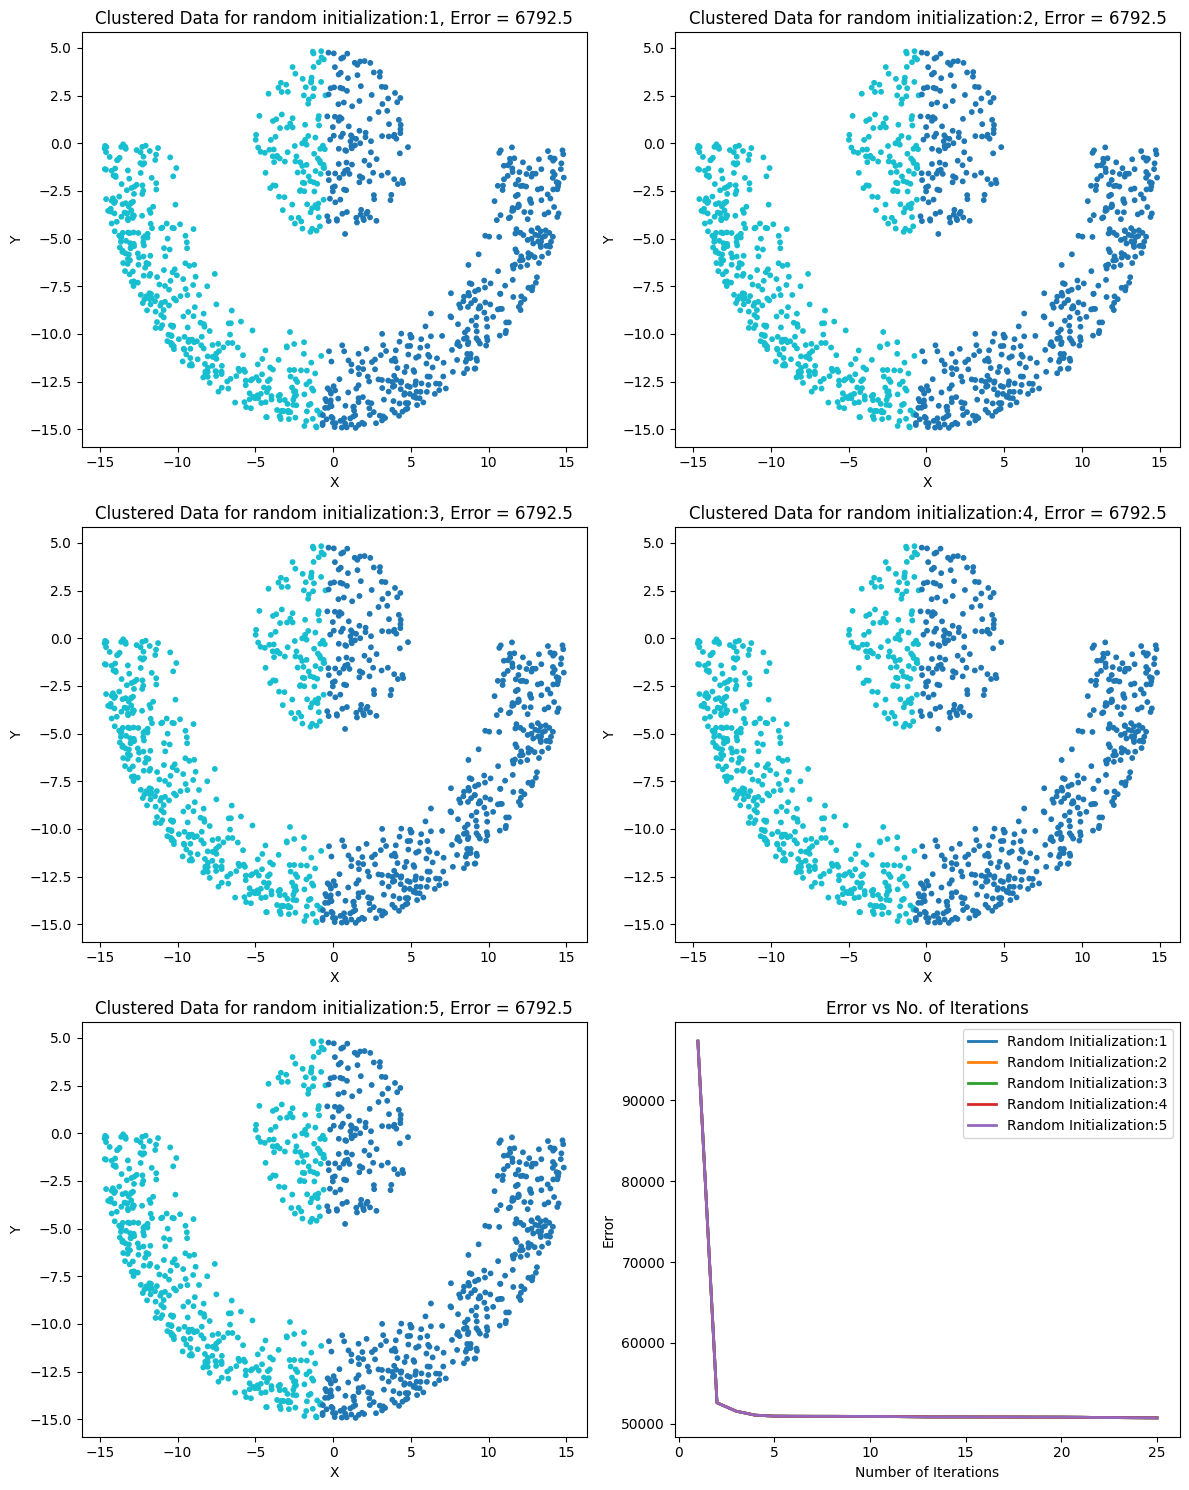

In [66]:
numbers = list(range(1000))
num_clusters = 2
error_for_rand_init = []
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
for ii in range(5):
    
    z_assignment, errorset_for_one_init = lloyds_algo(initial_data.T, num_clusters)
    
    error_for_rand_init.append(errorset_for_one_init)
    colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))
    cluster_colors = colors[z_assignment]
    axes[int(ii/2), int(ii%2)].scatter(x_vals, y_vals, c=cluster_colors, s=10)
    axes[int(ii/2), int(ii%2)].set_title(f'Clustered Data for random initialization:{ii+1}, Error = {error_calc(initial_data, z_assignment):.1f}')
    axes[int(ii/2), int(ii%2)].set_xlabel('X')
    axes[int(ii/2), int(ii%2)].set_ylabel('Y')
for i in range(5):
    x_ind = np.arange(len(error_for_rand_init[i]))+1
    axes[2, 1].plot(x_ind, error_for_rand_init[i], label =f'Random Initialization:{i+1}', linewidth=2)
axes[2, 1].set_xlabel('Number of Iterations')
axes[2, 1].set_ylabel('Error')
axes[2, 1].set_title('Error vs No. of Iterations')
axes[2, 1].legend()
plt.tight_layout()
plt.show()


# Part 2 of the question

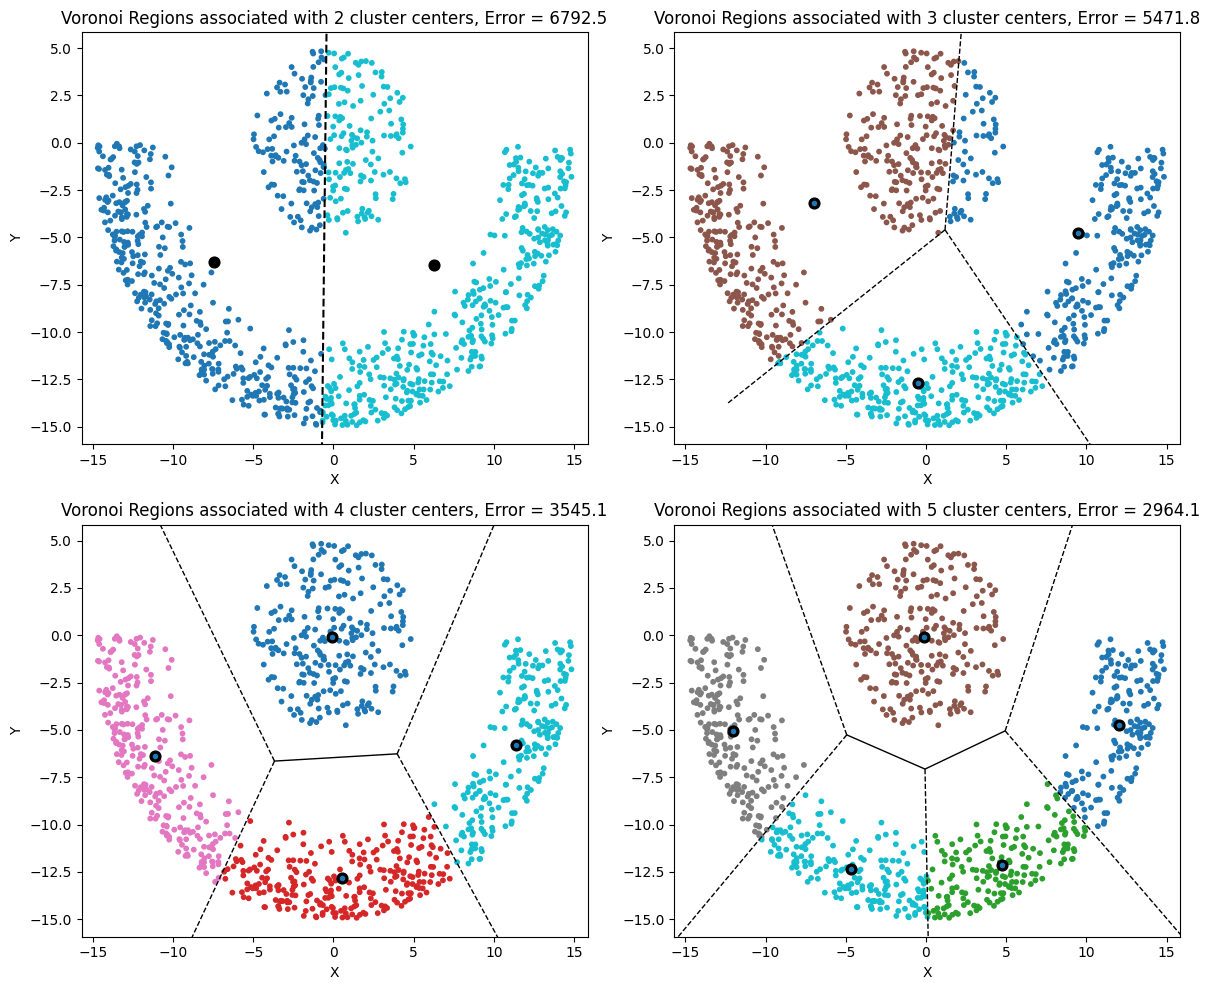

In [67]:
random.seed(0)
numbers = list(range(1000))
figs, axes = plt.subplots(2, 2, figsize=(12, 10))
num_clusters_set = [2, 3, 4, 5]
for num_clusters in num_clusters_set:
    num_points_in_clusters = np.zeros(num_clusters)
    z_assignment = np.random.randint(0, num_clusters, 1000)  #c1
    for i in range(1000):
        num_points_in_clusters[z_assignment[i]]+=1
    z_prev_assignment = np.zeros(1000).astype(int)
    means = []
    Error = []
    for j in range(num_clusters):
        count =0
        x_sum =0.0
        y_sum =0.0
        for i in range(1000):
            if(z_assignment[i]==j):
                x_sum+=x_vals[i]
                y_sum+=y_vals[i]
                count+=1
        x_sum/=count
        y_sum/=count
        means.append([x_sum, y_sum])
    
    iterations = 0
    while True:
        error = 0.0
        #  Reassignment
        for i in range(1000):
            z_prev_assignment[i] = z_assignment[i]
            error+=((x_vals[i]-means[z_assignment[i]][0])**2 + (y_vals[i]-means[z_assignment[i]][1])**2)
            z_assignment[i] = np.argmin([((x_vals[i]-means[j][0])**2 + (y_vals[i]-means[j][1])**2) for j in range(len(means))])
            num_points_in_clusters[z_prev_assignment[i]]-=1
            num_points_in_clusters[z_assignment[i]]+=1
            if(num_points_in_clusters[z_prev_assignment[i]]==0):
                z_assignment[i] = z_prev_assignment[i]
                num_points_in_clusters[z_assignment[i]]-=1
                num_points_in_clusters[z_prev_assignment[i]]+=1
        if(np.array_equal(z_assignment, z_prev_assignment)):
            break
        Error.append(error)
        #  Mean calculation
        means.clear()
        for j in range(num_clusters):
            count =0
            x_sum =0.0
            y_sum =0.0
            for i in range(1000):
                if(z_assignment[i]==j):
                    x_sum+=x_vals[i]
                    y_sum+=y_vals[i]
                    count+=1
            x_sum/=count
            y_sum/=count
            means.append([x_sum, y_sum])
        iterations +=1
    means_np= np.array(means)
    ii = num_clusters_set.index(num_clusters)
    if(num_clusters!=2):     
        vor = Voronoi(means_np)
        fig = voronoi_plot_2d(vor, ax = axes[int(ii/2), ii%2],show_vertices = False)
        
    else:
        midpoint = ((means_np[0][0] + means_np[1][0]) / 2, (means_np[0][1] + means_np[1][1]) / 2)
        slope = (means_np[1][1] - means_np[0][1]) / (means_np[1][0] - means_np[0][0])
        perp_slope = -1 / slope
        x_start = np.min(x_vals)-1
        x_end = np.max(x_vals)+1
        y_start = perp_slope * (x_start - midpoint[0]) + midpoint[1]
        y_end = perp_slope * (x_end - midpoint[0]) + midpoint[1]
        axes[int(ii/2), ii%2].plot([x_start, x_end], [y_start, y_end], linestyle= '--', color = 'black')
        
    colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))
    cluster_colors = colors[z_assignment]
    axes[int(ii/2), ii%2].scatter(x_vals, y_vals, c=cluster_colors, s=10)
    axes[int(ii/2), ii%2].scatter(means_np[:,0], means_np[:,1], c='black', s=60)
    axes[int(ii/2), ii%2].set_xlabel('X')
    axes[int(ii/2), ii%2].set_ylabel('Y')
    axes[int(ii/2), ii%2].set_xlim(np.min(x_vals)-1, np.max(x_vals)+1)
    axes[int(ii/2), ii%2].set_ylim(np.min(y_vals)-1, np.max(y_vals)+1)
    axes[int(ii/2), ii%2].set_title(f'Voronoi Regions associated with {num_clusters} cluster centers, Error = {error_calc(initial_data, z_assignment, np.array(means)):.1f}')
plt.tight_layout()
plt.show()

In [68]:
def normalize_rows(arr):
    row_mag = np.linalg.norm(arr, axis=1)
    row_mag = row_mag.reshape(-1, 1)
    normalized_mat = arr/row_mag
    return normalized_mat

# Parts 3 and 4 of the question

### Polynomial Kernel
In the plots below each row corresponds to a degree of the polynomial 'd'

In [69]:
def Kernel_pol(arr1, arr2, d):
    kernel_mat = np.full((1000, 1000), 0.0, dtype='float64')
    kernel_mat = (1 + np.matmul(arr1, arr2))**d
    centering_const = np.sum(kernel_mat, dtype='float64')/(1000*1000)
    kernel_product_mat = np.full((1000, 1000), 0.0, dtype = 'float64')
    #change
    row_sum_mat = np.sum(kernel_mat, axis=1, dtype='float64')/1000
    row_sum_mat = row_sum_mat.reshape(-1, 1)
    col_sum_mat = np.sum(kernel_mat, axis=0, dtype = 'float64')/1000
    kernel_product_mat = kernel_mat - row_sum_mat - col_sum_mat + centering_const
    for i in range(1000):
        kernel_product_mat[i][i]+=0.0001
        kernel_mat[i][i]+=0.0001
    return kernel_product_mat

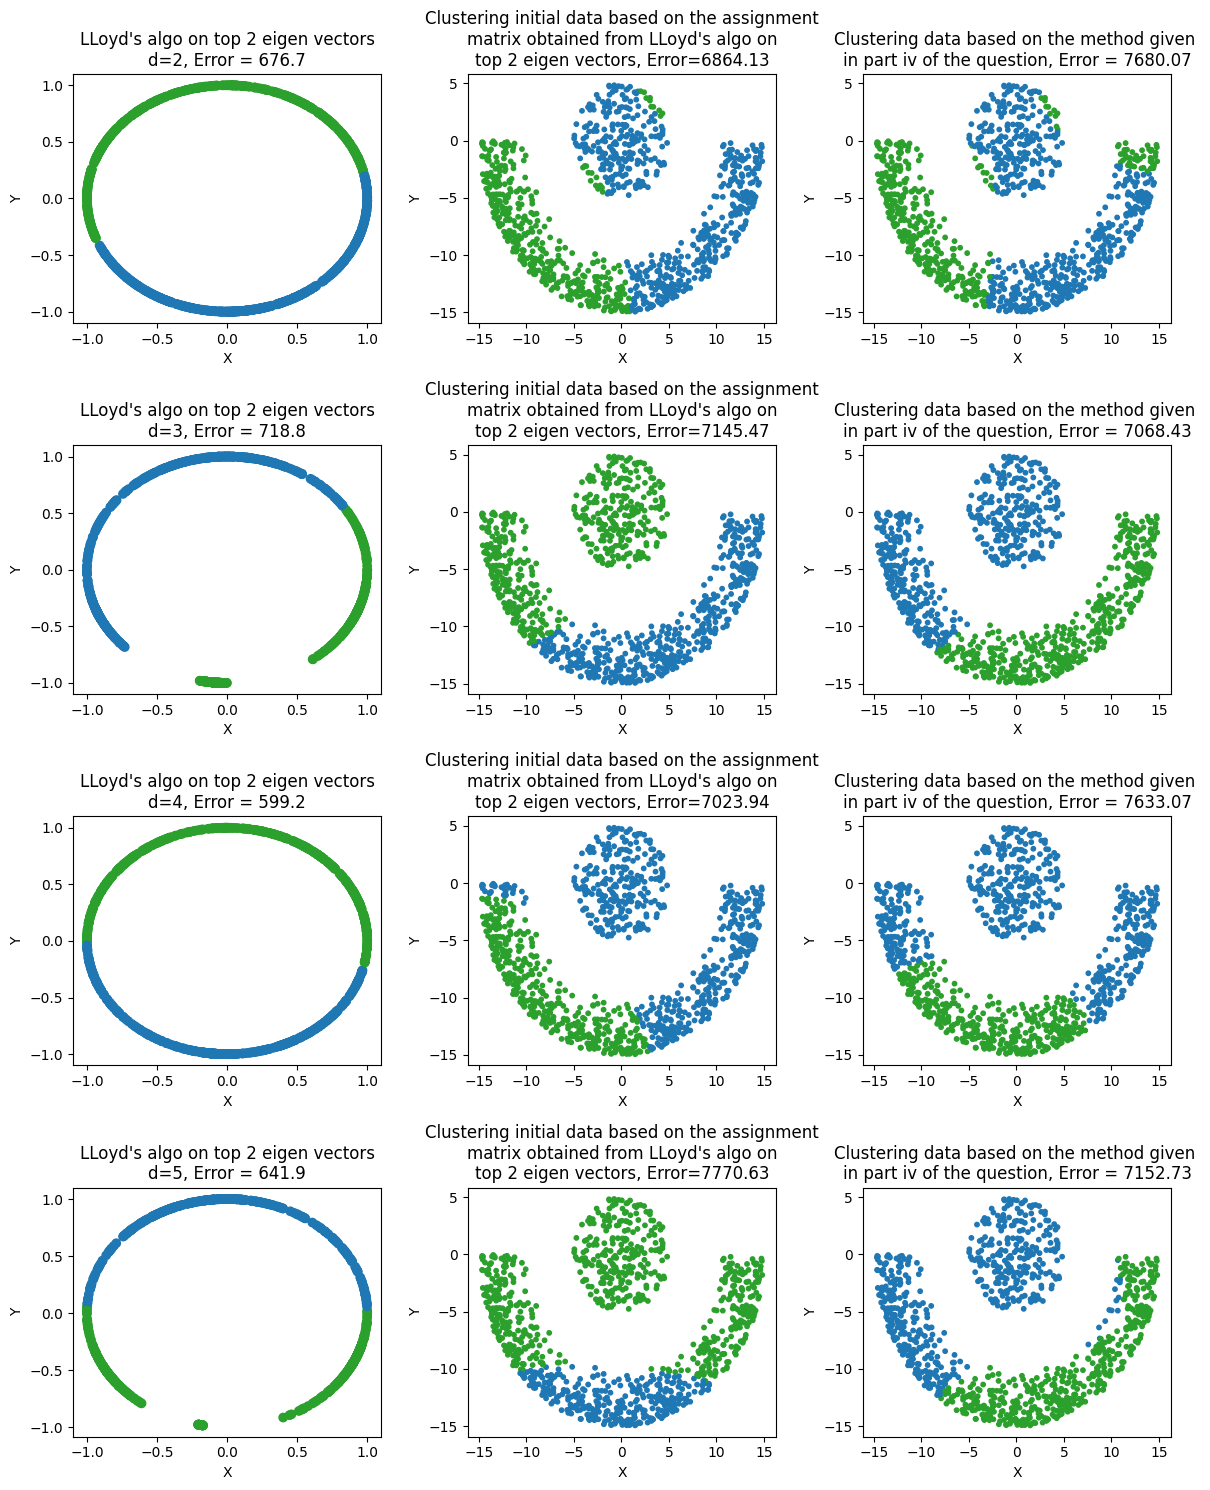

In [70]:
k = 2
n = initial_data[0].size
poly_ker_dim_set = [2, 3, 4, 5] # Degree of the Polynomial Kernel

figs, axes = plt.subplots(len(poly_ker_dim_set), 3, figsize = (12, 15*len(poly_ker_dim_set)/4))
itr=0
for polynomial_kernel_dimension in poly_ker_dim_set:
    kernel_pol = Kernel_pol(initial_data.T, initial_data, polynomial_kernel_dimension)
    eigen_val, eigen_vec = np.linalg.eigh(kernel_pol)
    eigen_val = eigen_val[::-1]
    eigen_vec = eigen_vec[:,::-1]
    H = np.full((n, k), 0.0, dtype='float64')
    for i in range(k):
        H[:,i] = eigen_vec[:,i]
    H_normalized = normalize_rows(H)
    z_assignment, error = lloyds_algo(H_normalized, 2)
    colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))
    cluster_colors = colors[z_assignment]
    axes[itr, 0].scatter(H_normalized[:,0], H_normalized[:,1], c=cluster_colors)
    axes[itr, 0].set_title(f'LLoyd\'s algo on top {k} eigen vectors\nd={polynomial_kernel_dimension}, Error = {error_calc(H_normalized.T, z_assignment):.1f}')
    axes[itr, 1].scatter(initial_data[0], initial_data[1], c=cluster_colors, s=10)
    axes[itr, 1].set_title(f'Clustering initial data based on the assignment\nmatrix obtained from LLoyd\'s algo on\ntop 2 eigen vectors, Error={error_calc(initial_data, z_assignment):.2f}')
    z_assignment = np.zeros(n).astype(int)
    for i in range(n):
        z_assignment[i] = np.argmax([eigen_vec[:,j][i] for j in range(k)])
    colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))
    cluster_colors = colors[z_assignment]
    axes[itr, 2].scatter(initial_data[0], initial_data[1], c=cluster_colors, s=10)
    axes[itr, 2].set_title(f'Clustering data based on the method given \nin part iv of the question, Error = {error_calc(initial_data, z_assignment):.2f}')
    itr+=1

for ax in axes.flat:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

### Radial Kernel
In the plots below each row corresponds to particular value of '$ \sigma $' in the radial basis function 

In [71]:
def Kernel_rad(data, sigma):
    n = initial_data[0].size
    kernel_mat2 = np.full((n, n), 0.0, dtype='float64') 
    for i in range(n):
        for j in range(n):
            kernel_mat2[i][j] = math.exp((-1*np.matmul(data[:,i]-data[:, j], data[:,i]-data[:,j], dtype='float64')/(2*(sigma**2))))
    centering_const2 = np.sum(kernel_mat2, dtype='float64')/(n*n)
    kernel_product_mat2 = np.full((n, n), 0.0, dtype='float64')
    #change
    row_sum_mat2 = np.sum(kernel_mat2, axis=1, dtype='float64')/n
    row_sum_mat2 = row_sum_mat2.reshape(-1, 1)
    col_sum_mat2 = np.sum(kernel_mat2, axis=0, dtype = 'float64')/n
    kernel_product_mat2 = kernel_mat2 - row_sum_mat2 - col_sum_mat2 + centering_const2
    for i in range(n):
        kernel_product_mat2[i][i]+=0.0001
    return kernel_product_mat2

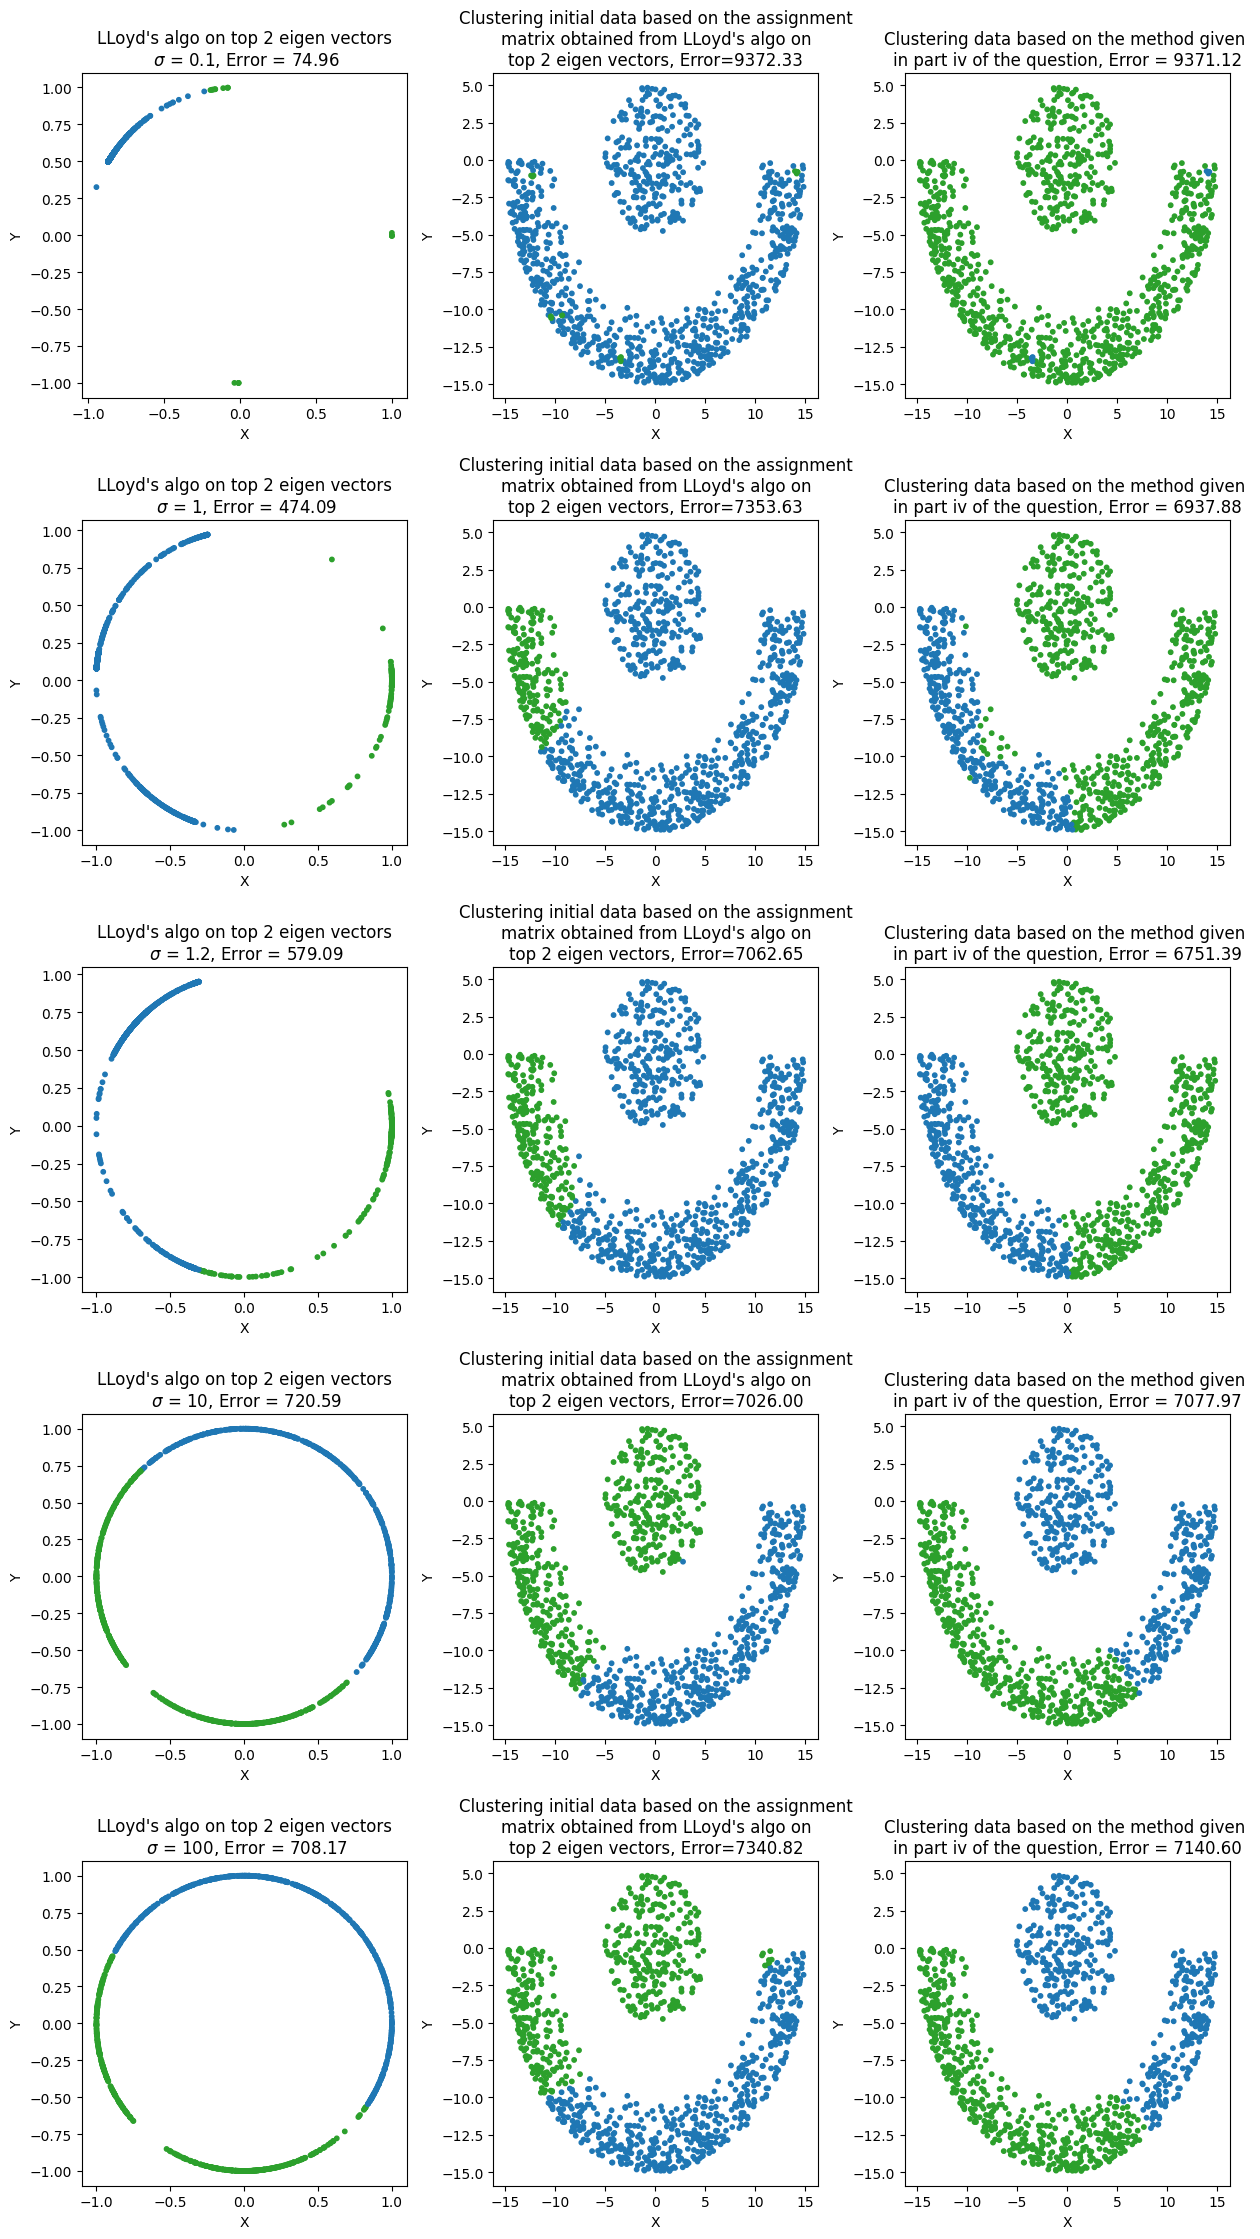

In [72]:
k = 2
n = initial_data[0].size
sigma_set = [0.1, 1, 1.2, 10, 100] # Sigma for the Radial Kernel
np.random.seed(0)
figs, axes = plt.subplots(len(sigma_set), 3, figsize = (12.5, 13.5*len(sigma_set)/3))
itr=0
for sigma in sigma_set:
    kernel_rad = Kernel_rad(initial_data, sigma)
    eigen_val, eigen_vec = np.linalg.eigh(kernel_rad)
    eigen_val = eigen_val[::-1]
    eigen_vec = eigen_vec[:,::-1]
    H = np.full((n, k), 0.0, dtype='float64')
    for i in range(k):
        H[:,i] = eigen_vec[:,i]
    H_normalized = normalize_rows(H)
    z_assignment, error = lloyds_algo(H_normalized, 2)
    colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))
    cluster_colors = colors[z_assignment]
    axes[itr, 0].scatter(H_normalized[:,0], H_normalized[:,1], c=cluster_colors, s=10)
    axes[itr, 0].set_title(f'LLoyd\'s algo on top {k} eigen vectors\n $\sigma$ = {sigma}, Error = {error_calc(H_normalized.T, z_assignment):.2f}')
    axes[itr, 1].scatter(initial_data[0], initial_data[1], c=cluster_colors, s=10)
    axes[itr, 1].set_title(f'Clustering initial data based on the assignment\nmatrix obtained from LLoyd\'s algo on\ntop 2 eigen vectors, Error={error_calc(initial_data, z_assignment):.2f}')
    z_assignment = np.zeros(n).astype(int)
    for i in range(n):
        z_assignment[i] = np.argmax([eigen_vec[:,j][i] for j in range(k)])
    colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))
    cluster_colors = colors[z_assignment]
    axes[itr, 2].scatter(initial_data[0], initial_data[1], c=cluster_colors, s=10)
    axes[itr, 2].set_title(f'Clustering data based on the method given \nin part iv of the question, Error = {error_calc(initial_data, z_assignment):.2f}')
    itr+=1

for ax in axes.flat:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
plt.tight_layout()
plt.show()